In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahwagih/mall-customers-segmentation")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mall-customers-segmentation


In [5]:
# Load the dataset from the CSV file
df=pd.read_csv("/kaggle/input/mall-customers-segmentation/Mall_Customers.csv")

In [6]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
##know more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
## describe the numerical columns
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
#columns names
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df.shape

(200, 5)

In [11]:
##duplication
df.duplicated().sum()

0

In [12]:
# to know datatypes of data's columns
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [13]:
##missing values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Numerical & Categorical Columns

In [17]:
def numerical_categorical_columns(df):
    """Return numerical and categorical column lists."""
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    return numeric_cols, categorical_cols

In [19]:
print("\n----- NUMERIC & CATEGORICAL COLUMNS -----")
num_cols, cat_cols = numerical_categorical_columns(df)
print(f"Numerical Columns: {num_cols}")
print(f"Categorical Columns: {cat_cols}")


----- NUMERIC & CATEGORICAL COLUMNS -----
Numerical Columns: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Categorical Columns: ['Genre']


## Statistical Describtion

In [22]:
def summary_dataframe(df):
    """Return summary of data types, unique values, and null ratios."""
    d_types = df.dtypes
    n_uniq = df.nunique()
    ratio = df.isnull().sum() / len(df)
    return pd.DataFrame({
        'DTypes': d_types,
        'N_Uniq': n_uniq,
        'Null_Ratio': ratio
    })

In [25]:
print("\n----- DATAFRAME SUMMARY -----")
print(summary_dataframe(df))


----- DATAFRAME SUMMARY -----
                        DTypes  N_Uniq  Null_Ratio
CustomerID               int64     200         0.0
Genre                   object       2         0.0
Age                      int64      51         0.0
Annual Income (k$)       int64      64         0.0
Spending Score (1-100)   int64      84         0.0


In [26]:
def statistical_summary(df):
    """Return transposed statistical summary."""
    return df.describe().T

print("\n----- STATISTICAL SUMMARY -----")
print(statistical_summary(df))


----- STATISTICAL SUMMARY -----
                        count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0  


In [27]:
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

## Visualize Numerical Columns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


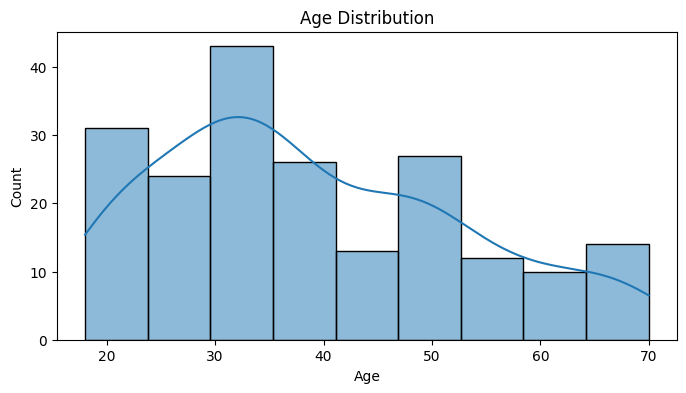

In [28]:
plt.figure(figsize = ( 8 , 4 ))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


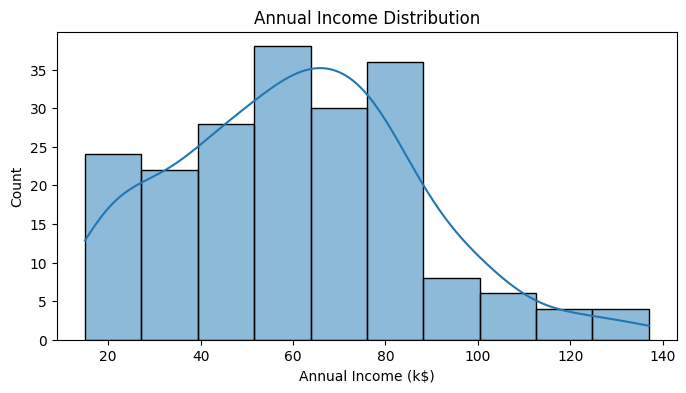

In [31]:
plt.figure(figsize = ( 8 , 4 ))
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title("Annual Income Distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


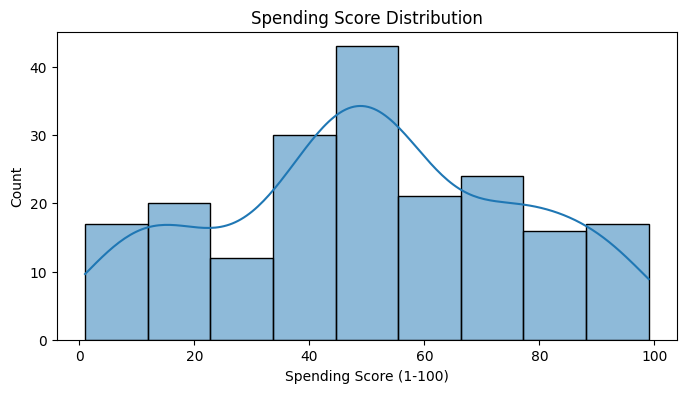

In [33]:
plt.figure(figsize = ( 8 , 4 ))
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title("Spending Score Distribution")
plt.show()

## Average Spending Score by Annual Income

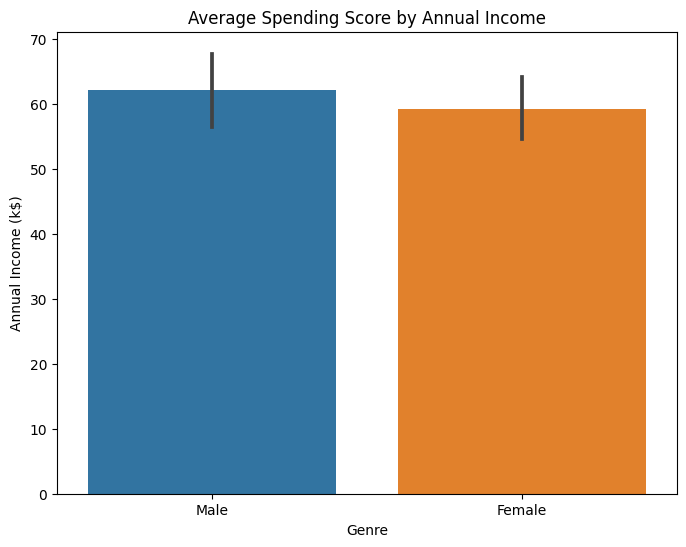

In [35]:
plt.figure(figsize = ( 8 , 6 ))
sns.barplot(x='Genre', y='Annual Income (k$)', data=df, estimator='mean')
plt.title("Average Spending Score by Annual Income")
plt.show()

## Relationships between Spending Score vs. Annual Income¶


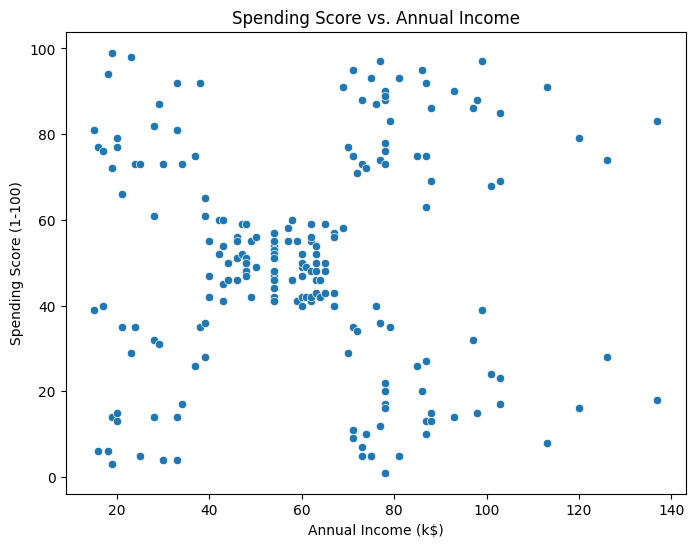

In [38]:
plt.figure(figsize = ( 8 , 6 ))
sns.scatterplot( x = 'Annual Income (k$)' , y = 'Spending Score (1-100)' , data = df )
plt.title("Spending Score vs. Annual Income")
plt.show()


## Feature Corelation

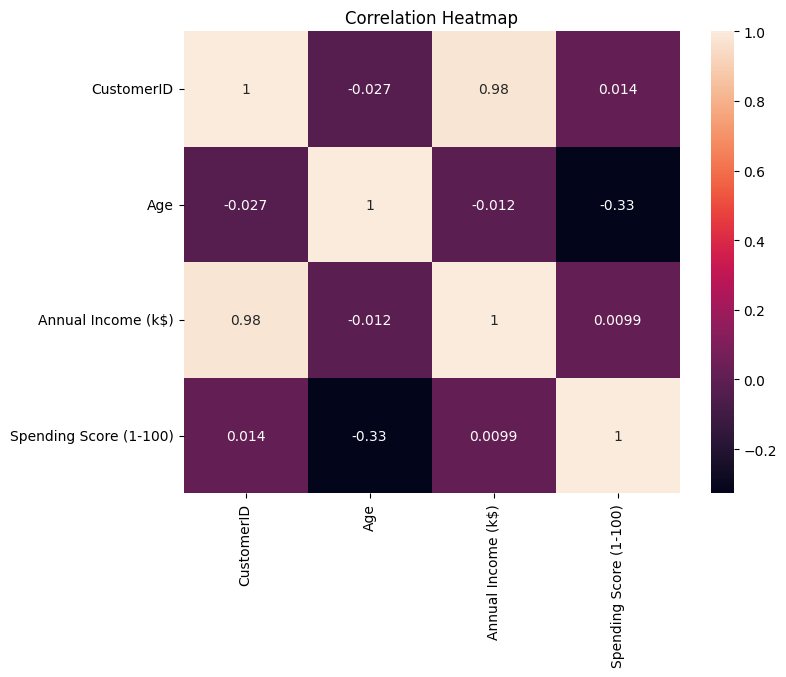

In [39]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
plt.figure(figsize = (8 , 6))
sns.heatmap(df[numeric_cols].corr() , annot = True ) 
plt.title("Correlation Heatmap")
plt.show()

## Outlires Detection

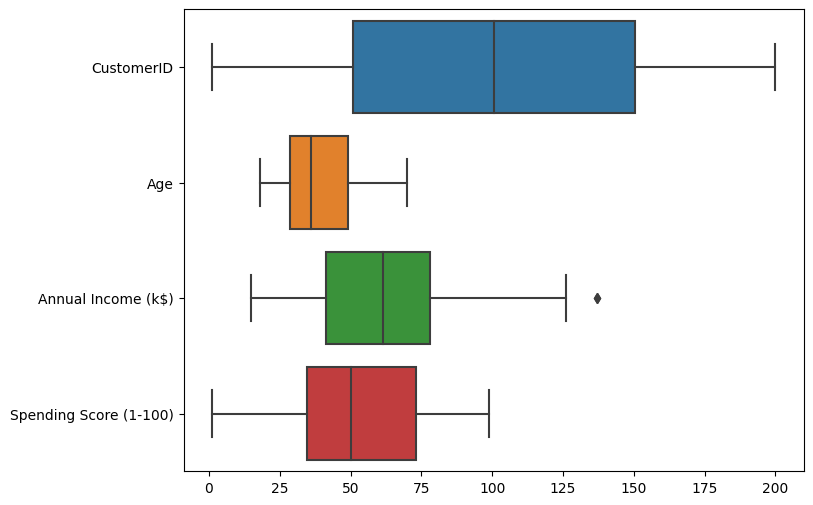

In [40]:
plt.figure(figsize = (8 , 6))
sns.boxplot(df[numeric_cols] , orient = 'h')
plt.show()

In [42]:
def handle_outliers(df):

    df_cleaned = df.copy()
    numeric_cols = df_cleaned.select_dtypes(include='number').columns.tolist()

    for col in numeric_cols:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_cleaned[col] = np.where(
            df_cleaned[col] < lower_bound, lower_bound,
            np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])
        )

    return df_cleaned

In [43]:
df_new = handle_outliers(df)

In [46]:
df_cleaned = df_new.drop(['CustomerID' , 'Genre' , 'Age' ], axis=1 )

In [49]:
X=df_cleaned[['Annual Income (k$)', 'Spending Score (1-100)']]

In [50]:
from sklearn.preprocessing import StandardScaler
x_scale=StandardScaler()
x_scale=x_scale.fit_transform(X)

## Elbow Method

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

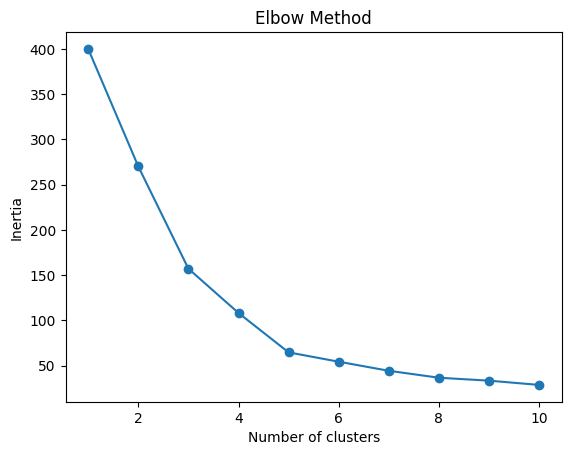

In [51]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE


inertia = [] 
for i in range (1 ,11):
    kmeans = KMeans (n_clusters = i , random_state = 42)
    kmeans.fit(x_scale)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [53]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(df_cleaned)
    score = silhouette_score(df_cleaned, labels)
    print(f'Clusters: {i}, Silhouette Score: {score:.3f}')

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

Clusters: 2, Silhouette Score: 0.297
Clusters: 3, Silhouette Score: 0.468
Clusters: 4, Silhouette Score: 0.494
Clusters: 5, Silhouette Score: 0.555
Clusters: 6, Silhouette Score: 0.540
Clusters: 7, Silhouette Score: 0.527
Clusters: 8, Silhouette Score: 0.459
Clusters: 9, Silhouette Score: 0.458
Clusters: 10, Silhouette Score: 0.449


## Apply KMeans Clustering¶


In [54]:
kmeans= KMeans(n_clusters=5 , init='k-means++', random_state=42)
y_kmean= kmeans.fit_predict(x_scale)
df_cleaned['Cluster']=y_kmean

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


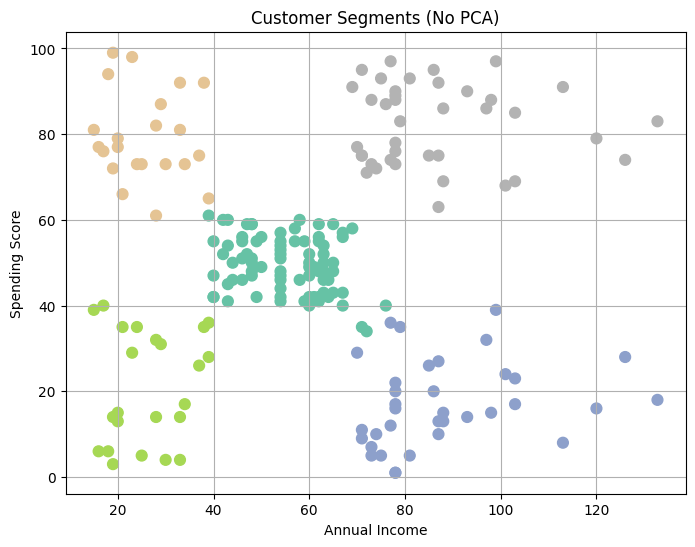

In [55]:
plt.figure(figsize=(8, 6))

# Plot using two original (or scaled) features
plt.scatter(
    df_cleaned['Annual Income (k$)'],
    df_cleaned['Spending Score (1-100)'],
    c=df_cleaned['Cluster'],
    cmap='Set2',
    s=60
)

plt.title("Customer Segments (No PCA)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True)

## DBSCAN

In [57]:
from sklearn.cluster import DBSCAN

In [71]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(x_scale)


df_cleaned['DB_Cluster'] = dbscan_labels

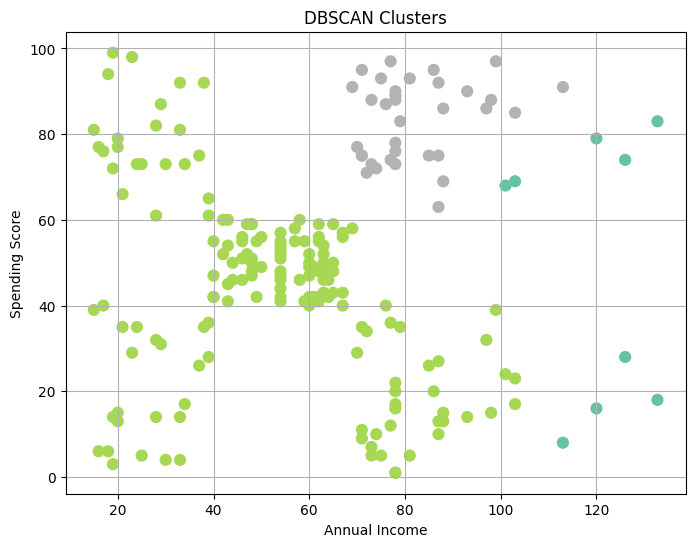

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_cleaned['Annual Income (k$)'],
    df_cleaned['Spending Score (1-100)'],
    c=df_cleaned['DB_Cluster'],
    cmap='Set2',
    s=60
)
plt.title("DBSCAN Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()

In [63]:
df_cleaned.groupby('Cluster')['Spending Score (1-100)'].mean().round(3)

Cluster
-1    49.222
 0    43.102
 1    83.235
Name: Spending Score (1-100), dtype: float64

In [73]:
df_cleaned.groupby('DB_Cluster')['Spending Score (1-100)'].mean().round(2)

DB_Cluster
-1    49.22
 0    43.10
 1    83.24
Name: Spending Score (1-100), dtype: float64

In [74]:
df_cleaned[df_cleaned['DB_Cluster'] != -1].groupby('DB_Cluster')['Spending Score (1-100)'].mean().round(2)

DB_Cluster
0    43.10
1    83.24
Name: Spending Score (1-100), dtype: float64